In [151]:
# ANALYSIS OF TIME SERIES DATA(TEMPERATURE)

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [153]:
df = pd.read_csv('C:/Users/DELL/Downloads/daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [154]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


In [155]:
df.isnull().sum()

Date                          2210
Daily minimum temperatures       0
dtype: int64

In [156]:
# Replace '?' with an empty string and convert to float
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].str.replace('?', '', regex=False).astype(float)

In [157]:
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype('int64')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1440 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 57.2 KB


In [159]:
df.shape

(3650, 2)

In [160]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1440,1985-12-21 11:12:00,1981-01-01 00:00:00,1983-06-26 06:00:00,1985-12-22 00:00:00,1988-06-16 18:00:00,1990-12-12 00:00:00,NaN
Daily minimum temperatures,3650.0,10.748219,0.0,8.0,11.0,14.0,26.0,4.090428


In [161]:
df.set_index('Date',inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to NaT
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Daily minimum temperatures  3650 non-null   int64
dtypes: int64(1)
memory usage: 57.0 KB


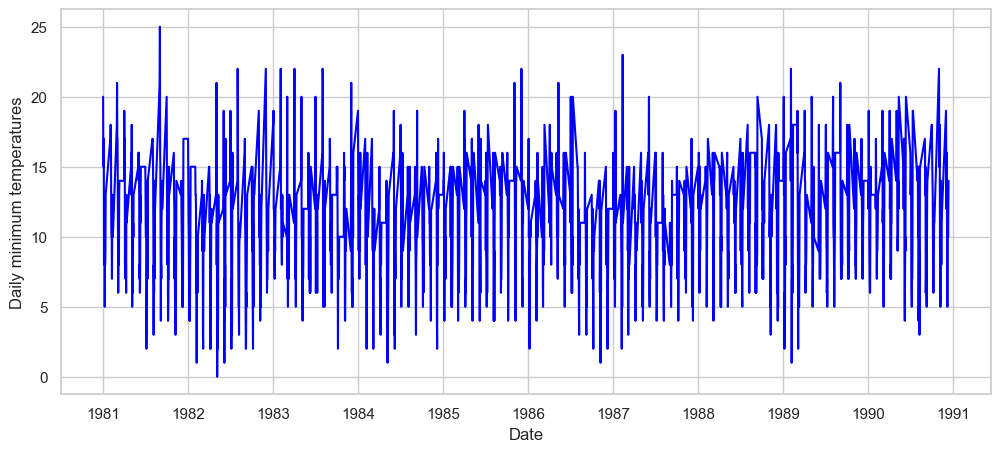

In [163]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(data = df, x = df.index, y = 'Daily minimum temperatures',color ='blue' )
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3480\3437904188.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


<Axes: xlabel='Date', ylabel='Daily minimum temperatures'>

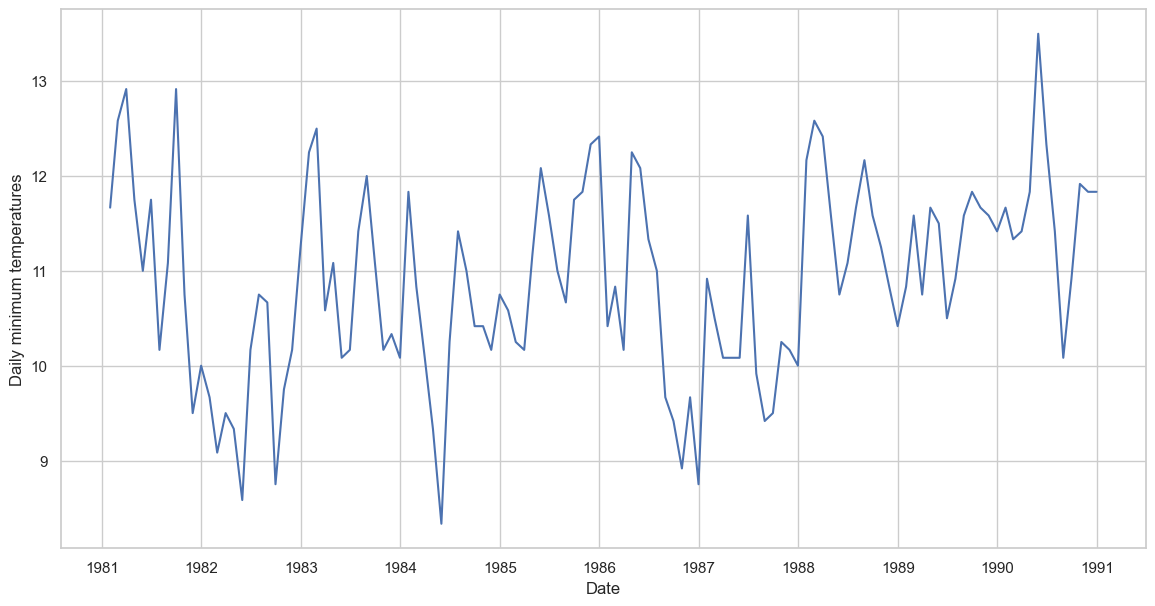

In [164]:
# Resample the data to monthly averages
# Grouping into month rather than day to avoid overcrowding

monthly_data = df.resample('M').mean()

# Plotting the monthly average temperatures
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Daily minimum temperatures')

In [165]:
# Checking if data is stationary
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

def adf_test(series):
    result =adfuller(series)
    print('ADF Stat: ', result[0])
    print('p-value: ',result[1])

adf_test(df['Daily minimum temperatures'])

# Data is stationary


ADF Stat:  -4.456772927332435
p-value:  0.0002351985779355612


In [166]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20
1981-02-01,17
1981-03-01,18
1981-04-01,14
1981-05-01,15


In [167]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to NaT
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Daily minimum temperatures  3650 non-null   int64
dtypes: int64(1)
memory usage: 57.0 KB


NaN values: 0
Infinite values: 0
NaN values: 30
Infinite values: 0
NaN values: 0
Infinite values: 0
NaN values: 30
Infinite values: 0
Error during decomposition: Axis limits cannot be NaN or Inf


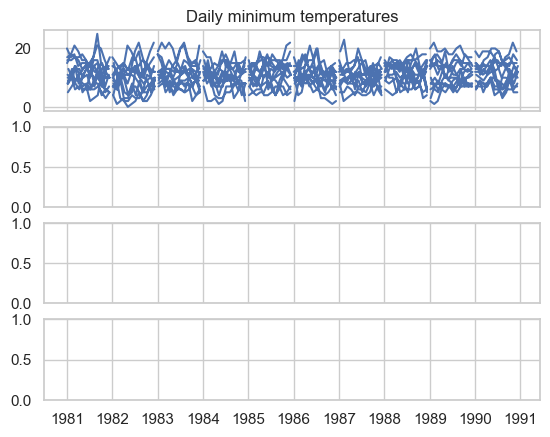

In [168]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with 'Date' as index and the correct date frequency set
# Perform seasonal decomposition with specified period
# Perform seasonal decomposition with a shorter period
try:
    decomposition = seasonal_decompose(df['Daily minimum temperatures'], model='additive', period=30)  # Adjust period to 30

    # Check for NaN or infinite values in the components
    for component in [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid]:
        print("NaN values:", np.isnan(component).sum())
        print("Infinite values:", np.isinf(component).sum())

    # Plot the decomposition
    fig = decomposition.plot()
    fig.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

except ValueError as e:
    print("Error during decomposition:", e)